In [10]:
import numpy as np
import pandas as pd
import importlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
import utils_sequence

# Prepare data

In [97]:
datain = pd.read_csv("datasets/csv5.csv")
datain['Date'] = pd.to_datetime(datain['Date'])
datalist = datain['Value'].to_numpy()
dsize = datalist.size

In [90]:
n_steps = 25
n_features = 1
X, y = utils_sequence.split_pre_post(datalist, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
X_train = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
# return_sequences=True,
model.add(LSTM(50, activation='linear', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='linear'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
%time model.fit(X_train, y, epochs=200, verbose=0)

CPU times: total: 2min 13s
Wall time: 37.2 s


# Evaluation to existing data

In [91]:
%%time
tail_list = []
for x in X:
    x_input = x.reshape((1, n_steps, n_features))
    tail_list.append(model.predict(x_input, verbose=0).flatten()[0])

CPU times: total: 23.3 s
Wall time: 18.5 s


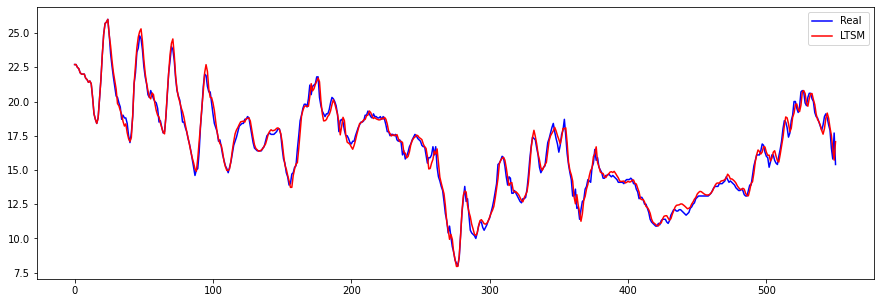

In [92]:
modeled = np.concatenate([X[0], np.array(tail_list)])

x_axis = np.arange(dsize)
plt.figure(figsize=(15,5))
plt.plot(x_axis, datalist, color="b", label="Real")
plt.plot(x_axis, modeled, color="r", label="LTSM")
plt.legend(loc='upper right')

# Future points

In [93]:
n_extra = 200
x_axis_future = np.arange(dsize + n_extra)

predicted = datalist.tolist()
for i in range(n_extra):
    x_input = np.array(predicted[-n_steps:]).reshape((1, n_steps, n_features))
    predicted.append(model.predict(x_input, verbose=0).flatten()[0])

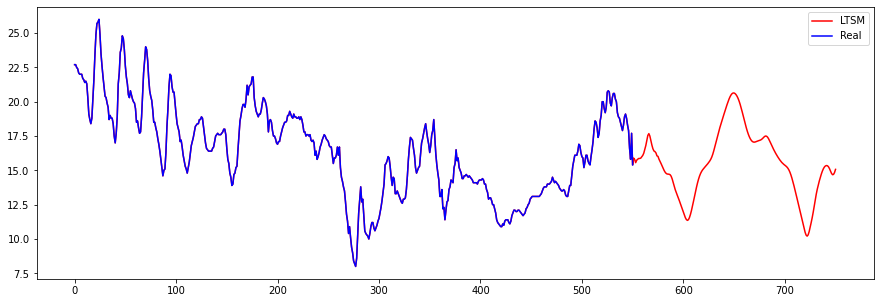

In [96]:
plt.figure(figsize=(15,5))
plt.plot(x_axis_future, predicted, color="r", label="LTSM")
plt.plot(x_axis, datalist, color="b", label="Real")
plt.legend(loc='upper right')